<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):





### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### Clean dataset

In [0]:
df =df.replace('?', None)
df[11][0]='n'

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,n,y,y,y,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [0]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [0]:
df.describe(exclude='number')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,n,y,n,y,y,y,y,n,y,n,n,y,y,n,y
freq,267,243,223,255,250,220,278,248,249,220,218,280,257,222,254,250,343


In [0]:
# Change n/y to binary
df =df.replace('y', 1)
df = df.replace('n', 0)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [0]:
df.columns = ['class', 'infants', 'water_cost', 'budget', 'fee_freeze', 'aid_elsalvador', 'rel_school', 'satellite', 'aid_contras', 'mx_missle', 'immigration', 'cutback', 'education', 'right_to_sue', 'crime', 'duty_free_ex', 'export_south_africa']
df.head()

,class,infants,water_cost,budget,fee_freeze,aid_elsalvador,rel_school,satellite,aid_contras,mx_missle,immigration,cutback,education,right_to_sue,crime,duty_free_ex,export_south_africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [0]:
df.describe()

,infants,water_cost,budget,fee_freeze,aid_elsalvador,rel_school,satellite,aid_contras,mx_missle,immigration,cutback,education,right_to_sue,crime,duty_free_ex,export_south_africa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.441379,0.487356,0.586207,0.425287,0.505747,0.63908,0.570115,0.572414,0.494253,0.501149,0.356322,0.409195,0.510345,0.583908,0.425287,0.788506
std,0.497123,0.500416,0.493079,0.494956,0.500543,0.48082,0.495630,0.495298,0.500543,0.500574,0.479463,0.492252,0.500469,0.493477,0.494956,0.408838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Subset data into 2 subset for democrats and republicans 

In [0]:
df_republican = df[df['class']== 'republican']

In [0]:
df_republican.head()

,class,infants,water_cost,budget,fee_freeze,aid_elsalvador,rel_school,satellite,aid_contras,mx_missle,immigration,cutback,education,right_to_sue,crime,duty_free_ex,export_south_africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
10,republican,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0


In [0]:
df_republican.shape

(168, 17)

In [0]:
df_republican.columns

Index(['class', 'infants', 'water_cost', 'budget', 'fee_freeze',
       'aid_elsalvador', 'rel_school', 'satellite', 'aid_contras', 'mx_missle',
       'immigration', 'cutback', 'education', 'right_to_sue', 'crime',
       'duty_free_ex', 'export_south_africa'],
      dtype='object')

In [0]:
df_republican.describe()

,infants,water_cost,budget,fee_freeze,aid_elsalvador,rel_school,satellite,aid_contras,mx_missle,immigration,cutback,education,right_to_sue,crime,duty_free_ex,export_south_africa
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.190476,0.482143,0.130952,0.988095,0.952381,0.898810,0.255952,0.166667,0.113095,0.547619,0.136905,0.827381,0.851190,0.958333,0.107143,0.666667
std,0.393851,0.501175,0.338357,0.108782,0.213596,0.302482,0.437700,0.373792,0.317656,0.499215,0.344774,0.379047,0.356965,0.200424,0.310219,0.472814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df_democrat = df[df['class']== 'democrat']

In [0]:
df_democrat.head()

,class,infants,water_cost,budget,fee_freeze,aid_elsalvador,rel_school,satellite,aid_contras,mx_missle,immigration,cutback,education,right_to_sue,crime,duty_free_ex,export_south_africa
2,democrat,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,1


In [0]:
df_democrat.shape

(267, 17)

In [0]:
df_democrat.describe()

,infants,water_cost,budget,fee_freeze,aid_elsalvador,rel_school,satellite,aid_contras,mx_missle,immigration,cutback,education,right_to_sue,crime,duty_free_ex,export_south_africa
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.599251,0.490637,0.872659,0.071161,0.224719,0.475655,0.767790,0.827715,0.734082,0.471910,0.494382,0.146067,0.295880,0.348315,0.625468,0.865169
std,0.490971,0.500851,0.333980,0.257576,0.418181,0.500345,0.423035,0.378337,0.442650,0.500148,0.500907,0.353837,0.457295,0.477331,0.484911,0.342185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Generate Confidence intervals
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
from scipy import stats
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

### Infants issue

In [0]:
dem_infants= df_democrat['infants']

In [0]:
dem_infants.describe()

count    267.000000
mean       0.599251
std        0.490971
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: infants, dtype: float64

In [0]:
sample_size = 100
sample = dem_infants.sample(sample_size)
sample.head()

426    1
22     1
19     1
202    1
289    1
Name: infants, dtype: int64

In [0]:
sample_mean = sample.mean()
sample_std = np.std(sample, ddof=1)
print(sample_mean, sample_std)

0.58 0.49604496374885837


In [0]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

0.049604496374885836

In [0]:
t = 1.84
(sample_mean, sample_mean - t*standard_error, sample_mean + t*standard_error)

(0.58, 0.48872772667021, 0.6712722733297899)

In [0]:
confidence_interval(sample, confidence=0.95)

(0.58, 0.4815739174219005, 0.6784260825780994)

In [0]:
confidence_interval(dem_infants,confidence=0.95 )

(0.599250936329588, 0.5400909065910334, 0.6584109660681426)

(array([42.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

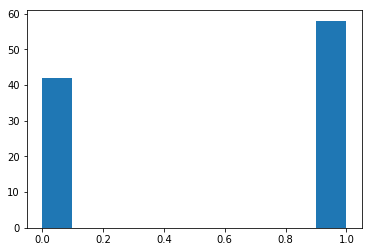

In [0]:
# So the mean, 0.59925 falls between the confidence interval of 0.54 and 0.65
#    which is confirmed below via the histogram 
plt.hist(sample, bins=10)

In [0]:
rep_infants= df_republican['infants']

In [0]:
rep_infants.describe()

count    168.000000
mean       0.190476
std        0.393851
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: infants, dtype: float64

In [0]:
sample_size1 = 100
sample1 = rep_infants.sample(sample_size1)
sample1.head()

166    1
224    0
310    0
33     0
79     0
Name: infants, dtype: int64

In [0]:
sample_mean1 = sample1.mean()
sample_std1 = np.std(sample1, ddof=1)
print(sample_mean1, sample_std1)

0.17 0.37752516806863706


In [0]:
standard_error1 = sample_std1/np.sqrt(sample_size)
standard_error1

0.03775251680686371

In [0]:
t = 1.84
(sample_mean1, sample_mean1 - t*standard_error1, sample_mean1 + t*standard_error1)

(0.17, 0.10053536907537079, 0.23946463092462922)

In [0]:
confidence_interval(sample1, confidence=0.95)

(0.17, 0.09509081618970464, 0.2449091838102954)

(array([83.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

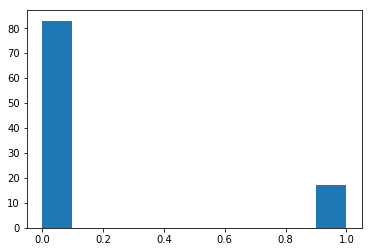

In [0]:
# So the mean, 0.19 falls between the confidence interval of 0.112 and 0.268
#    which is confirmed below via the histogram
plt.hist(sample1)


### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# make a crosstab
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


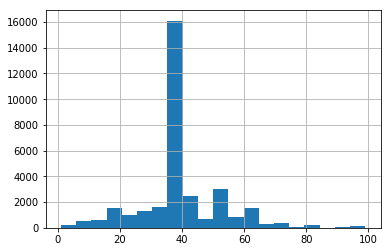

In [0]:
df['hours-per-week'].hist(bins=20); # focus on this like lecture but will use age instead of sex

In [0]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
# see if difference in age in hours per week so turning hours-per-week into a category, nonnumerical and compare to sex
cut_points =[0,9,19,29,39,49,500] # cutoff points for hours per week
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']  # split into these time buckets
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [0]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [0]:
# create the crosstab
df = df.sort_values(by='hours_per_week_categories')
contingency_table = pd.crosstab(df['age'], df['hours_per_week_categories'], margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
age,,,,,,,
17,30,137,131,43,54,0,395
18,30,107,195,93,110,15,550
19,7,104,191,155,211,44,712
20,13,83,160,150,312,35,753
21,17,62,114,142,336,49,720
22,13,55,122,138,369,68,765
23,8,43,125,140,472,89,877
24,5,25,66,116,475,111,798
25,6,18,55,111,549,102,841


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i\ total})(column_{j\ total} ) }{(\text{total observations})}  
\end{align}

In [0]:
row_sums = contingency_table.iloc[0:2, 6].values  # extract 0 row to 2, not including 2
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print('__')
print(col_sums)

[395 550]
__
[  7 104 191 155 211  44]


In [0]:
total = contingency_table.loc['All','All']
total

32561

In [0]:
# showing how to manually get chi squared, although can do throug scipy
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[0.08491754 1.26163201 2.31703572 1.88031694 2.55965726 0.53376739]
 [0.11823961 1.7567028  3.22625226 2.61816283 3.56407973 0.74322042]]


## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [0]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

105140363.97180688

## Run a $\chi^{2}$ Test using Scipy

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_square, p_value, dof, expected)
# chi is 2287, p value so small its 0.0 so can reject it

105140363.97180688 0.0 5 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [0]:
# Reject null that hours per week is independent of age

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)